<a href="https://colab.research.google.com/github/oreomcflurryyy/data-analysis/blob/main/melbourne_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d dansbecker/melbourne-housing-snapshot
!unzip "melbourne-housing-snapshot"

Dataset URL: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
License(s): CC-BY-NC-SA-4.0
100% 451k/451k [00:00<00:00, 747kB/s]
100% 451k/451k [00:00<00:00, 746kB/s]
Archive:  melbourne-housing-snapshot.zip
  inflating: melb_data.csv           


### Loading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

In [3]:
data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Missing values in `Car`, `BuildingArea`, `YearBuilt`, `CouncilArea`.

In [5]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Baseline Model



This code snippet builds, trains, and evaluates a simple linear regression model to predict prices only based on `Rooms`. This can be treated as the baseline.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

R-squared: 2.556e-01
Mean Squared Error: 2.957e+11


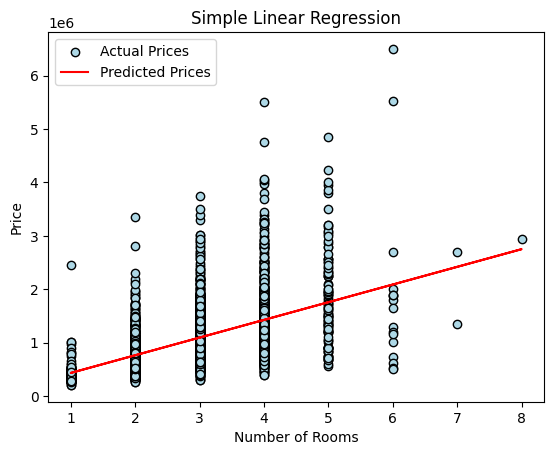

In [7]:
X = data[['Rooms']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.3e}")
print(f"Mean Squared Error: {mse:.3e}")

# Visualize the results
plt.scatter(X_test, y_test, color='lightblue', edgecolors='k', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

### Data Preprocessing

We have null values in some columns, removing them will reduce sample size. We will relate those values with other features in the dataset to impute values. Let us check the correlations for all numerical columns. We separate the numerical and categorical columns.

In [8]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical Columns:", numeric_cols)
print("\nCategorical Columns:", categorical_cols)

Numerical Columns: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

Categorical Columns: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


Checking the correlation between numerical columns.

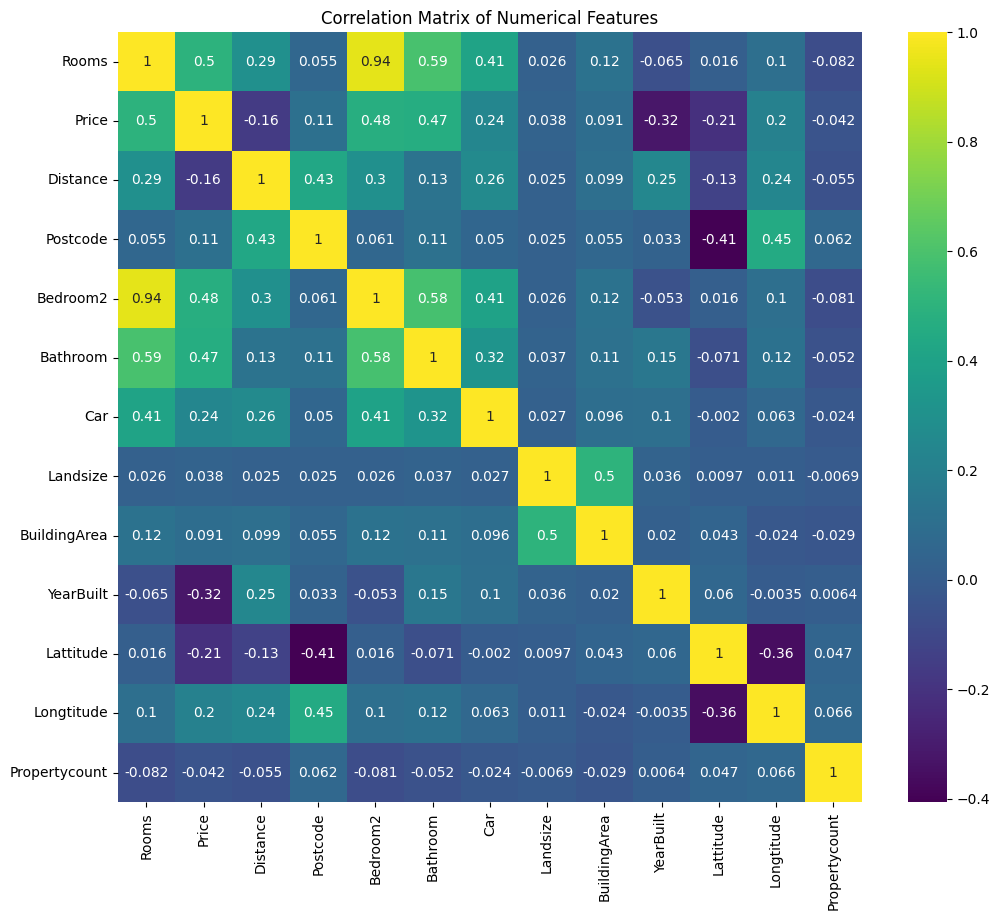

In [9]:
# Correlation Plot
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

BuildingArea has positive correlation with Landsize (0.5) while Car can be roughly related to Rooms (0.41), Bedroom2 (0.41), Bathroom (0.32), Price (0.24) and Distance (0.26) which makes sense.
More the number of rooms, likely has a carspot too at a greater price. Greater distance from central business district has slightly higher chances to provide for a carspot.

We use a multivariate imputation algorithm to estimate the missing values.

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)

# BuildingArea
imputed_data1 = imp.fit_transform(data[['BuildingArea', 'Landsize']])
data[['BuildingArea', 'Landsize']] = imputed_data1

# Car
imputed_data2 = imp.fit_transform(data[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car']])
data[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car']] = imputed_data2

YearBuilt can be related to the SellerG (as seller is likely to built multiple properties around the same time), its Price and Distance from CBD (we can expect newer properties farther from happening places and unsurprisingly lower prices).

We aim to fill in missing YearBuilt values by using KNN imputation within each SellerG group, while falling back on the median of the entire dataset if necessary.

In [11]:
sellerg_groups = data.groupby('SellerG')

# Function to impute 'YearBuilt' for a specific SellerG group
def impute_yearbuilt(group):

    if group['YearBuilt'].isnull().any():
        # Subset with non-missing 'YearBuilt', 'Price', and 'Distance'
        subset = group.dropna(subset=['YearBuilt', 'Price', 'Distance'])

        if subset.empty:
            group['YearBuilt'] = data['YearBuilt'].median()
        else:
          from sklearn.impute import KNNImputer

          imputer = KNNImputer(n_neighbors=5)
          imputation_cols = ['YearBuilt', 'Price', 'Distance']
          missing_indices = group['YearBuilt'].isnull()

          # Create a temporary DataFrame with missing values for imputation
          temp_df = group.loc[missing_indices, imputation_cols]

          # Impute missing values in the temporary DataFrame and update original group
          imputed_values = imputer.fit_transform(subset[imputation_cols])
          temp_df.loc[:, 'YearBuilt'] = imputer.transform(temp_df)[:, 0]
          group.loc[missing_indices, 'YearBuilt'] = temp_df['YearBuilt']

    return group

data = sellerg_groups.apply(impute_yearbuilt).reset_index(drop=True)
print(data['YearBuilt'].isnull().sum())

0


<ipython-input-11-fbb11bb14b17>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = sellerg_groups.apply(impute_yearbuilt).reset_index(drop=True)


### Exploratory Data Analysis

Plotting histograms for numerical features to understand their distributions.

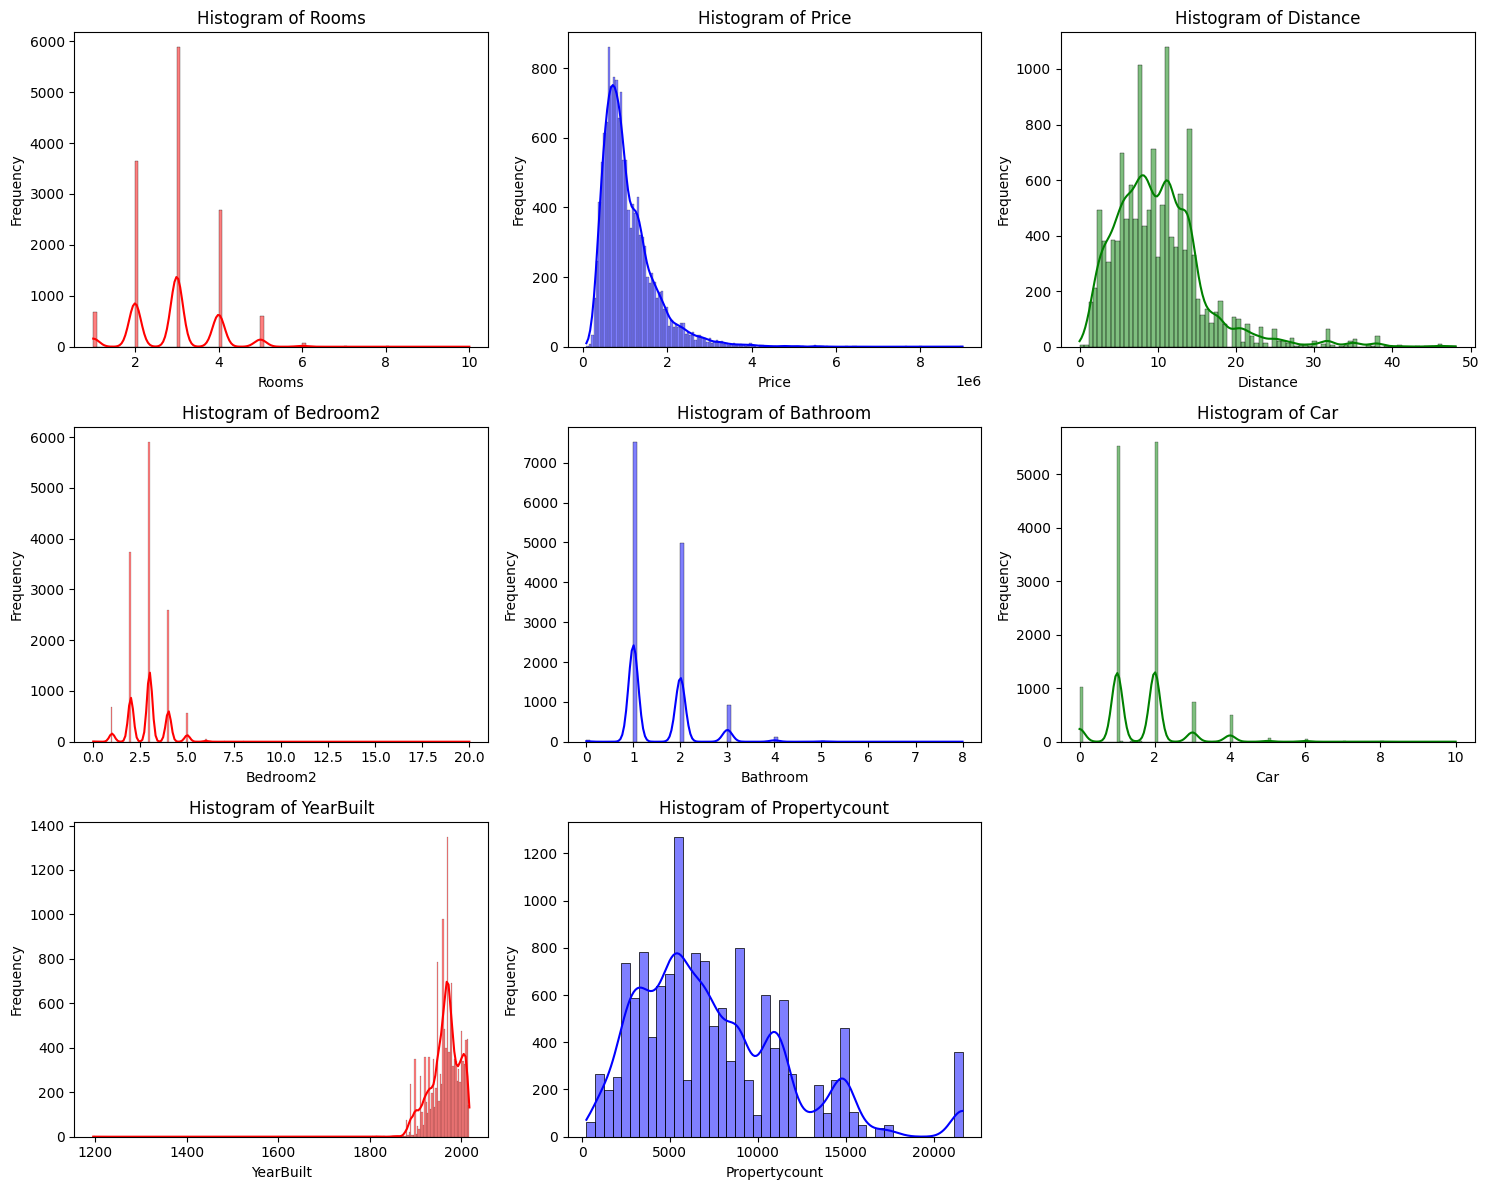

In [12]:
cols_to_exclude = ['Postcode', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude']
num_cols = [col for col in numeric_cols if col not in cols_to_exclude]
num_plots = len(num_cols)
rows = (num_plots + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()
colors = ['red', 'blue', 'green']

for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=axes[i], kde=True, color=colors[i % len(colors)])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Using box plots to identify outliers and understand the spread of the data. We need to determine if outliers are due to data entry errors or if they represent valid but rare cases and affect Price of property acoordingly.

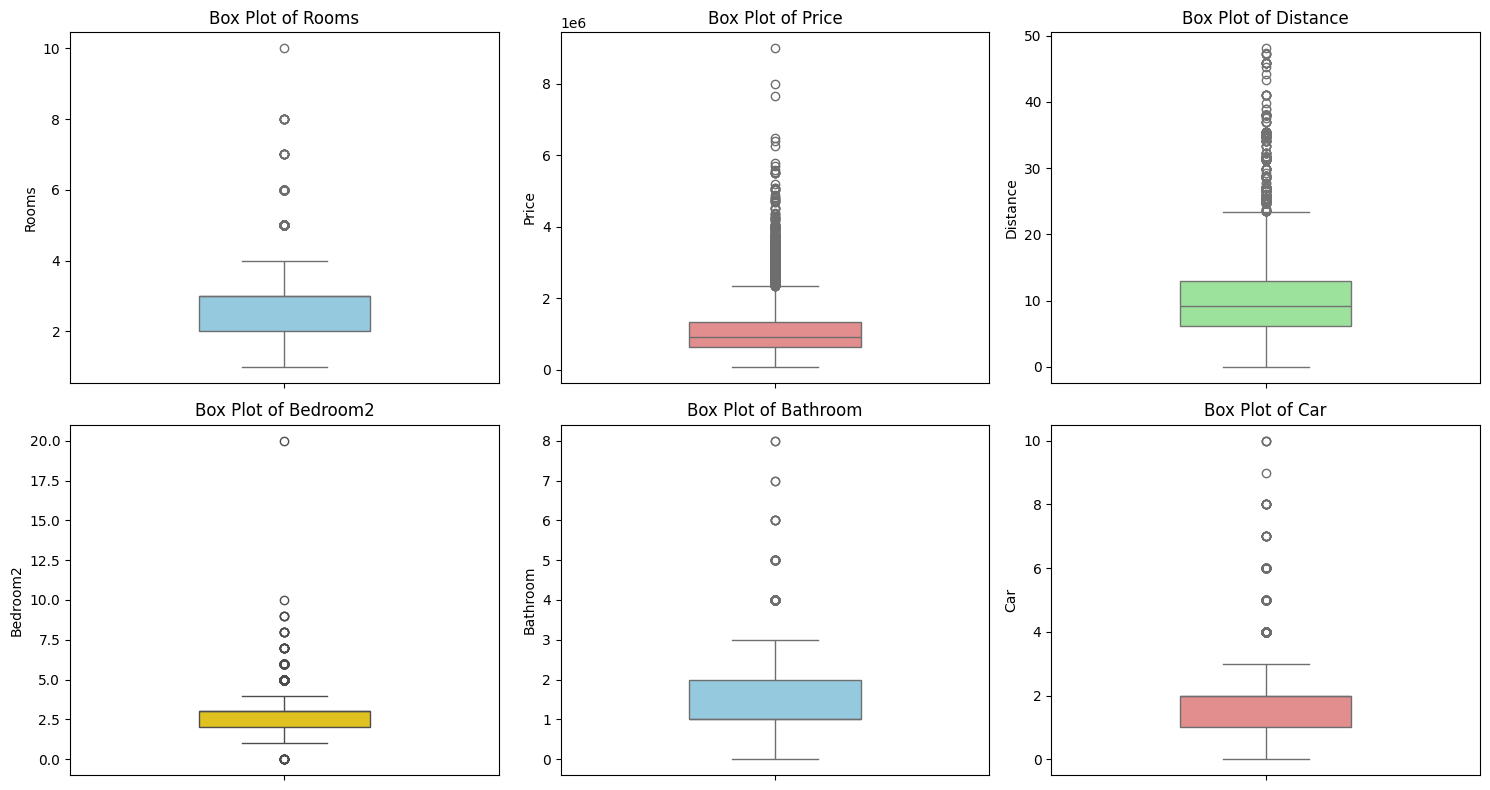

In [13]:
cols_to_exclude = ['Postcode', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'YearBuilt', 'Propertycount']
num_cols = [col for col in numeric_cols if col not in cols_to_exclude]
num_plots = len(num_cols)
rows = (num_plots + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i], color=colors[i % len(colors)], width=0.4)
    axes[i].set_title(f'Box Plot of {col}')

for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

For categorical data, we use bar plots to see the frequency of each category.

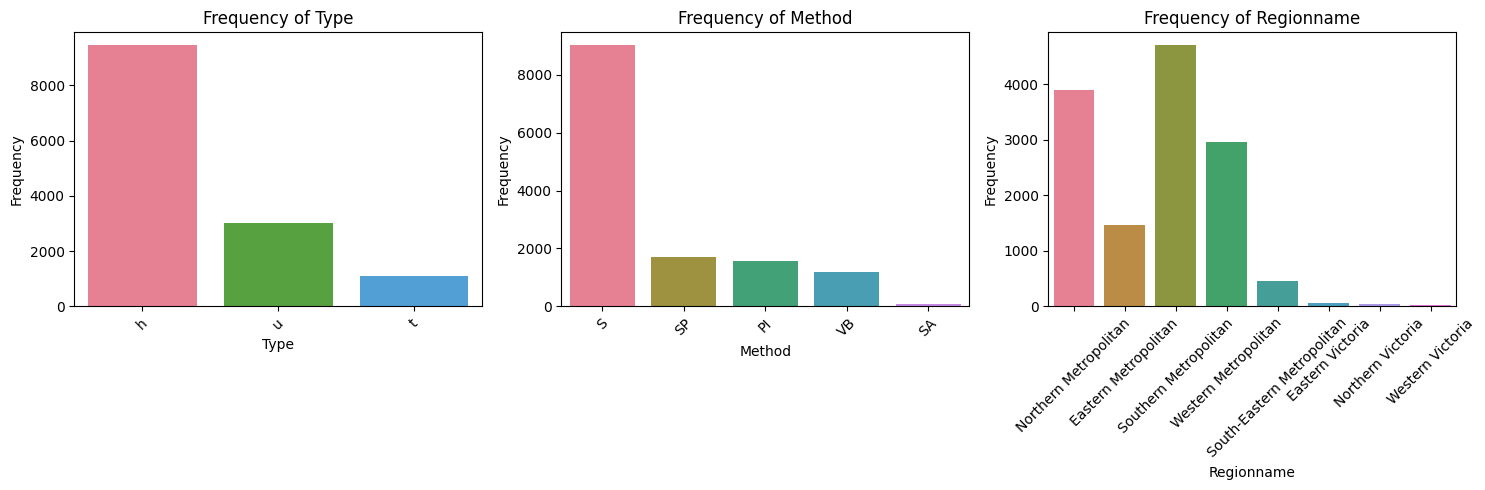

In [14]:
def plot_categorical_features(data, cols):
    num_plots = len(cols)
    rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        if col in data.columns:
            try:
                num_categories = len(data[col].unique())
                colors = sns.color_palette("husl", n_colors=num_categories)
                sns.countplot(x=col, data=data, ax=axes[i], hue=col, palette=colors, legend=False, dodge=False)

                axes[i].set_title(f'Frequency of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
                axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

            except Exception as e:
                print(f"Error plotting {col}: {e}")
        else:
            print(f"Column '{col}' not found in the DataFrame")

    for j in range(num_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

categorical_cols_to_plot = ['Type', 'Method', 'Regionname']
plot_categorical_features(data, categorical_cols_to_plot)

Using scatter plots to explore relationships between price and other numerical columns and spotting outliers. We can remove them so to avoid noise, this makes the model more efficient while training.


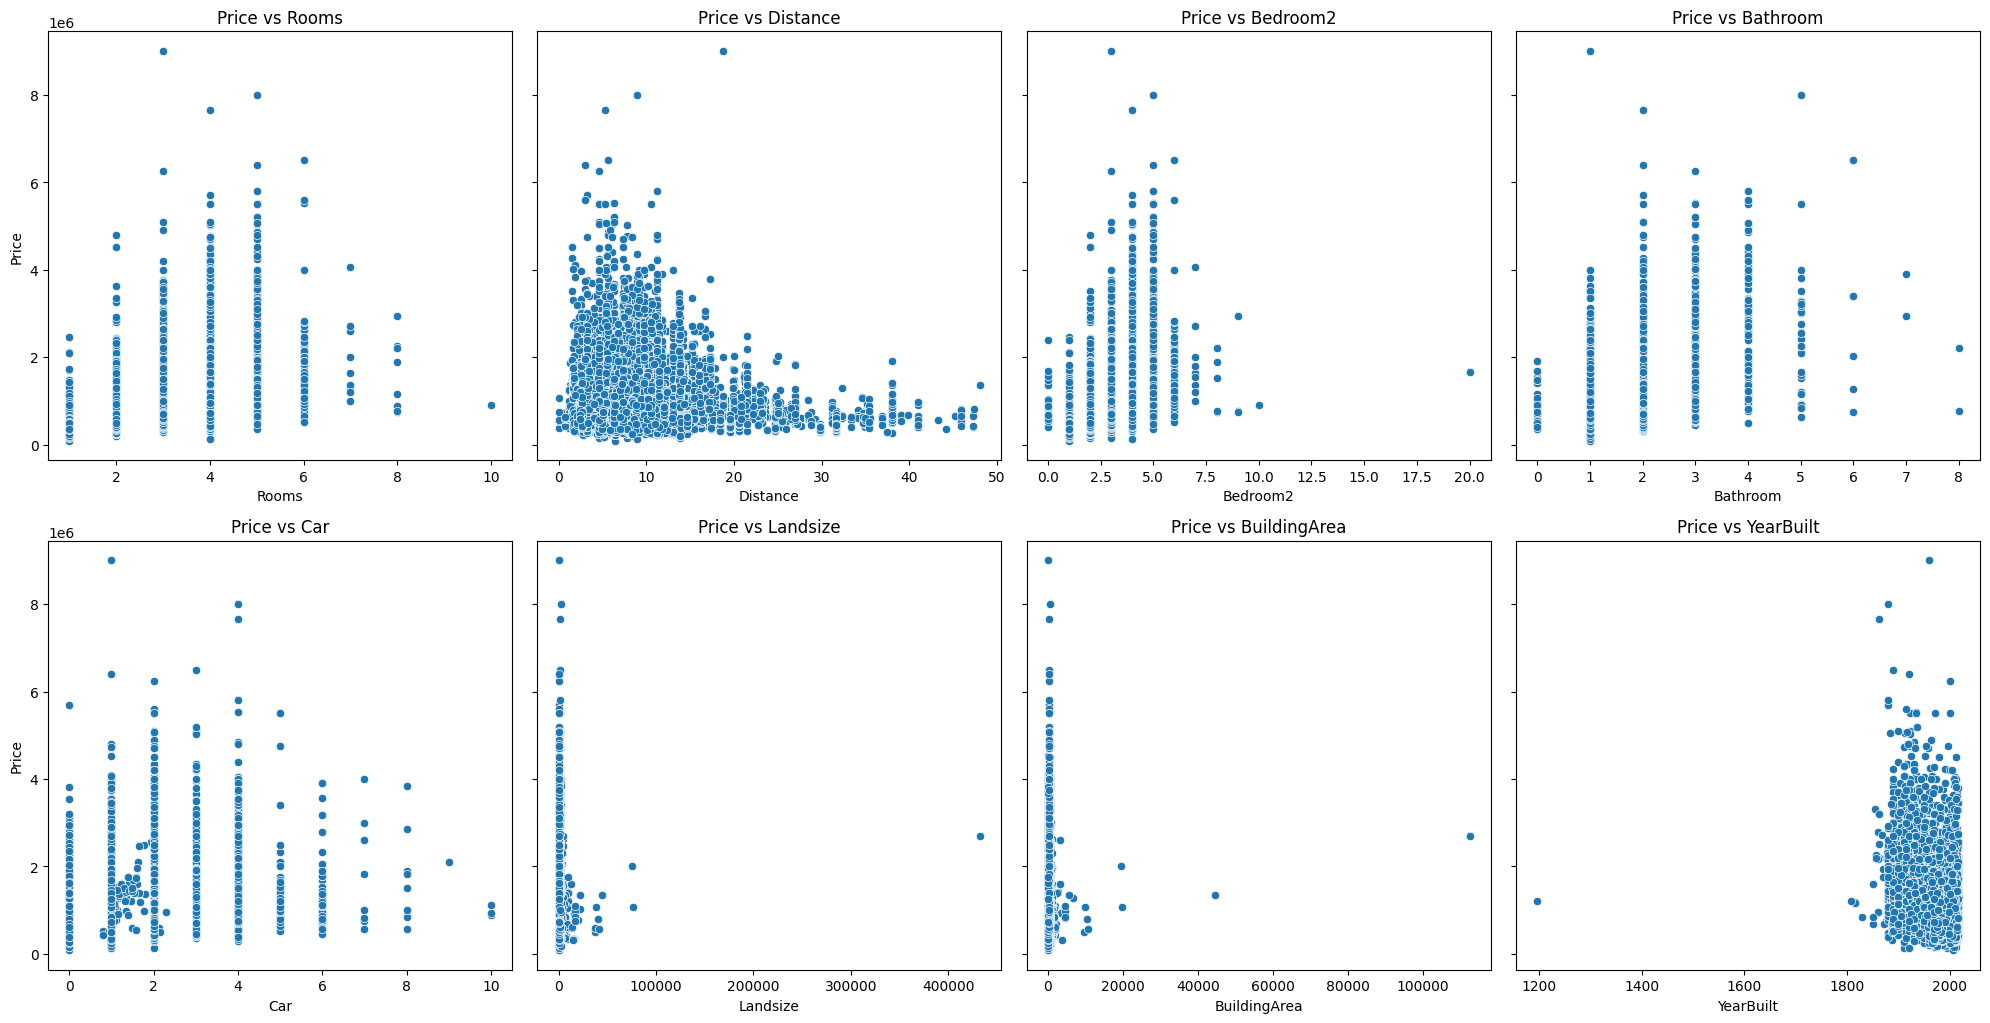

In [15]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(['Price', 'Lattitude', 'Longtitude', 'Postcode', 'Propertycount'])
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=data[col], y=data['Price'], ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
filtered_data = data[
    (data['Price'] <= 6.5e6) &
    (data['Landsize'] <= 50000) &
    (data['BuildingArea'] <= 10000)
]
print(filtered_data.shape)

(13570, 21)


Analysing the different categorical data and feature engineering.

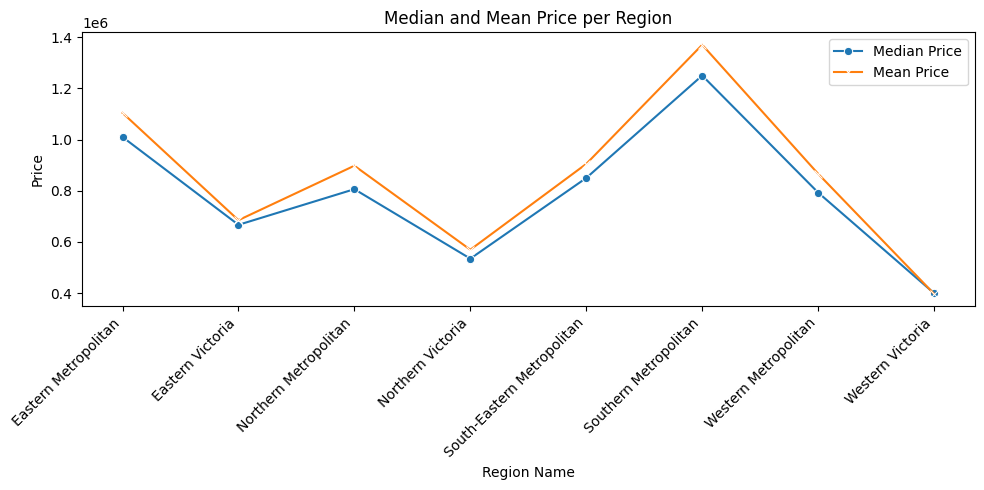

In [17]:
region_stats = filtered_data.groupby('Regionname')['Price'].agg(['median', 'mean']).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Regionname', y='median', data=region_stats, marker='o', label='Median Price')
sns.lineplot(x='Regionname', y='mean', data=region_stats, marker='x', label='Mean Price')

plt.xlabel('Region Name')
plt.ylabel('Price')
plt.title('Median and Mean Price per Region')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


We clearly find that Metropolitan regions have higher housing prices than Victoria regions. We can consider Eastern, Northern, Western and South-Eastern Metropolitan as a single category of Other Metropolitan regions. We can also consider Eastern and Northern Victoria as Other Victoria region. This gives us four categories in regions.

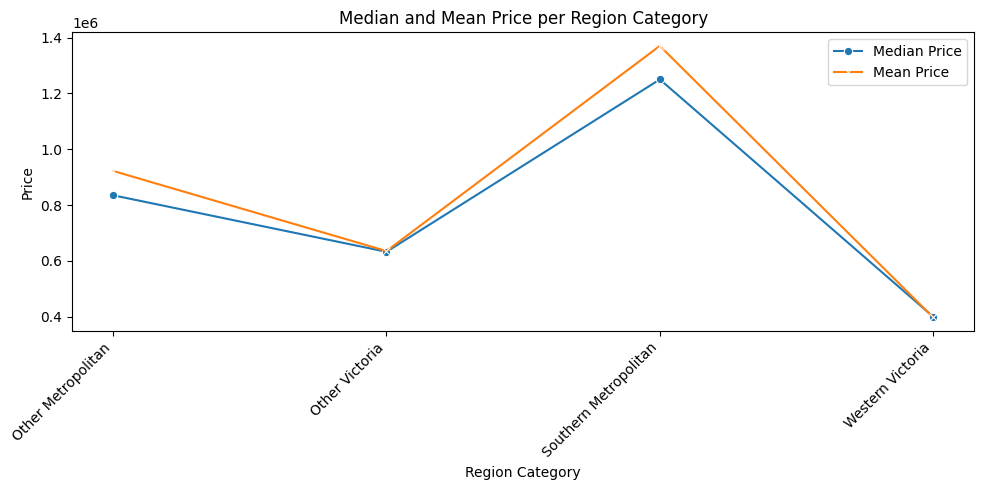

In [18]:
def categorize_region(region):
    if region in ['Eastern Metropolitan', 'Northern Metropolitan', 'Western Metropolitan', 'South-Eastern Metropolitan']:
        return 'Other Metropolitan'
    elif region in ['Eastern Victoria', 'Northern Victoria']:
        return 'Other Victoria'
    else:
        return region

filtered_data_categorized1 = filtered_data.copy()
filtered_data_categorized1.loc[:, 'RegionCategory'] = filtered_data_categorized1['Regionname'].apply(categorize_region)
region_category_stats = filtered_data_categorized1.groupby('RegionCategory')['Price'].agg(['median', 'mean']).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='RegionCategory', y='median', data=region_category_stats, marker='o', label='Median Price')
sns.lineplot(x='RegionCategory', y='mean', data=region_category_stats, marker='x', label='Mean Price')

plt.xlabel('Region Category')
plt.ylabel('Price')
plt.title('Median and Mean Price per Region Category')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

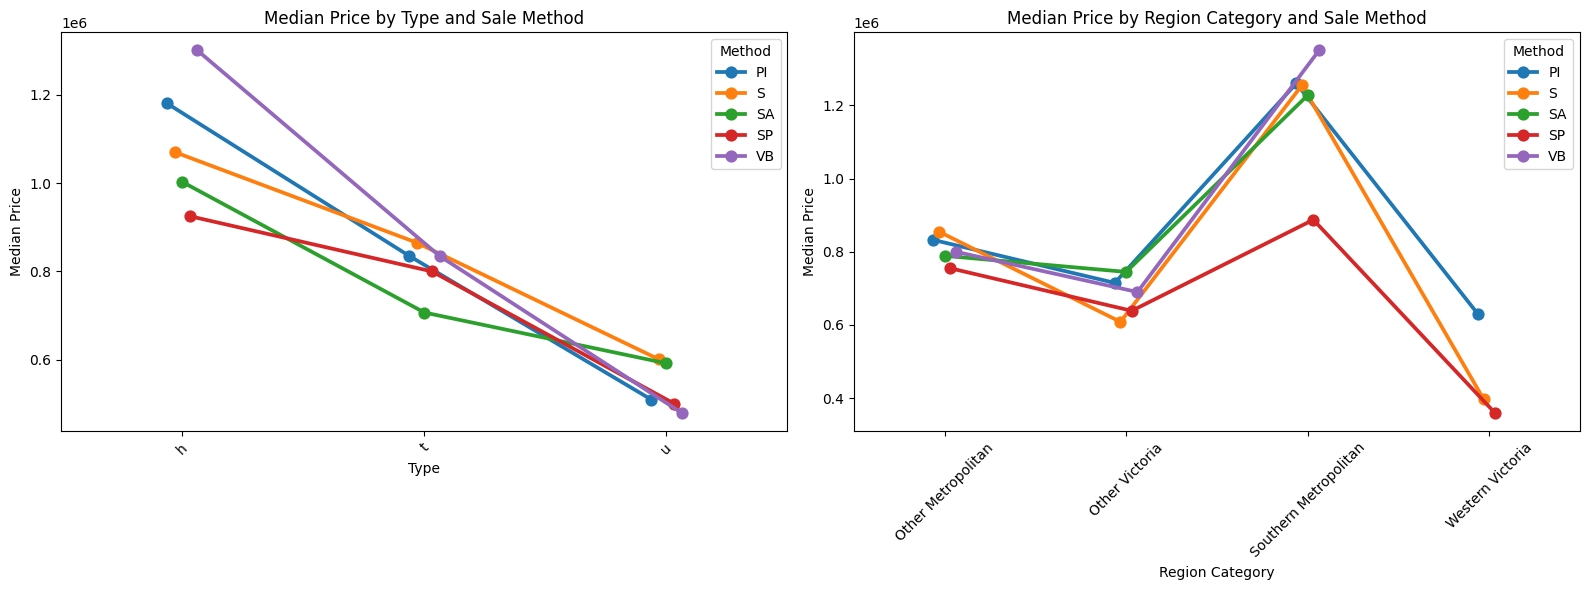

In [19]:
# Group data by 'Method' and 'Type' and calculate the median price
method_type_price = filtered_data_categorized1.groupby(['Method', 'Type'])['Price'].median().reset_index()

# Group data by 'Method' and 'RegionCategory' and calculate the median price
method_region_price = filtered_data_categorized1.groupby(['Method', 'RegionCategory'])['Price'].median().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a pointplot for 'Type'
sns.pointplot(x='Type', y='Price', hue='Method', data=method_type_price, dodge=True, ax=axes[0])
axes[0].set_title('Median Price by Type and Sale Method')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Median Price')
axes[0].tick_params(axis='x', rotation=45)

# Create a pointplot for 'RegionCategory'
sns.pointplot(x='RegionCategory', y='Price', hue='Method', data=method_region_price, dodge=True, ax=axes[1])
axes[1].set_title('Median Price by Region Category and Sale Method')
axes[1].set_xlabel('Region Category')
axes[1].set_ylabel('Median Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

What we observe is that method of sale does not vastly plays an effect on the housing prices. Not only that, houses are costlier than townhouses which are followed by units. Hence, while training the model, we will ignore the `Method` column.

Creating a new feature for the age of the property as `Age` = Year from `Date` - `YearBuilt`.

In [20]:
filtered_data_categorized1['Year'] = pd.DatetimeIndex(filtered_data_categorized1['Date']).year
filtered_data_categorized1['Age'] = filtered_data_categorized1['Year'] - filtered_data_categorized1['YearBuilt']

print(filtered_data_categorized1[['Date', 'Year', 'YearBuilt', 'Age']].head())

         Date  Year  YearBuilt   Age
0   3/06/2017  2017     1950.0  67.0
1  27/05/2017  2017     1990.0  27.0
2  12/11/2016  2016     1962.5  53.5
3  12/11/2016  2016     1962.5  53.5
4  30/07/2016  2016     1950.0  66.0


Creating categories for Suburb and SellerG based on their median prices to reduce number of raw sample categories.

In [21]:
# Categorize based on median price
def categorize_seller(median_price, q3, q1):
    if median_price > q3:
        return 'High Range'
    elif median_price >= q1 and median_price <= q3:
        return 'Mid Range'
    else:
        return 'Low Range'

In [22]:
# Calculate the median price for each seller
seller_median_prices = filtered_data_categorized1.groupby('SellerG')['Price'].median()
q1 = seller_median_prices.quantile(0.25)
q3 = seller_median_prices.quantile(0.75)

filtered_data_categorized1['SellerCategory'] = filtered_data_categorized1['SellerG'].map(lambda x: categorize_seller(seller_median_prices[x], q3, q1))
print(filtered_data_categorized1[['SellerG', 'Price', 'SellerCategory']].head())


   SellerG      Price SellerCategory
0  @Realty   725000.0      Low Range
1  @Realty   499000.0      Low Range
2      ASL  1090000.0     High Range
3      ASL  1200000.0     High Range
4      ASL   705500.0     High Range


In [23]:
# Calculate the median price for each suburb
suburb_median_prices = filtered_data_categorized1.groupby('Suburb')['Price'].median()
q1 = suburb_median_prices.quantile(0.25)
q3 = suburb_median_prices.quantile(0.75)

filtered_data_categorized1['SuburbCategory'] = filtered_data_categorized1['Suburb'].map(lambda x: categorize_seller(suburb_median_prices[x], q3, q1))
print(filtered_data_categorized1[['Suburb', 'Price', 'SuburbCategory']].head())

        Suburb      Price SuburbCategory
0  Craigieburn   725000.0      Low Range
1  Craigieburn   499000.0      Low Range
2       Coburg  1090000.0      Mid Range
3    Doncaster  1200000.0     High Range
4    Kingsbury   705500.0      Mid Range


Now we will one-hot code categorical variables and get dummies.

In [24]:
filtered_data_categorized1 = pd.get_dummies(filtered_data_categorized1, columns=['Type', 'RegionCategory', 'SellerCategory', 'SuburbCategory'])
filtered_data_categorized1.columns

Index(['Suburb', 'Address', 'Rooms', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Year', 'Age', 'Type_h', 'Type_t',
       'Type_u', 'RegionCategory_Other Metropolitan',
       'RegionCategory_Other Victoria', 'RegionCategory_Southern Metropolitan',
       'RegionCategory_Western Victoria', 'SellerCategory_High Range',
       'SellerCategory_Low Range', 'SellerCategory_Mid Range',
       'SuburbCategory_High Range', 'SuburbCategory_Low Range',
       'SuburbCategory_Mid Range'],
      dtype='object')

In [25]:
filtered_data_categorized1[['Rooms', 'Price','Distance', 'Bedroom2',
            'Bathroom', 'Car', 'Landsize','BuildingArea', 'Age',
            'Type_h', 'Type_t', 'Type_u', 'RegionCategory_Other Metropolitan',
            'RegionCategory_Other Victoria', 'RegionCategory_Southern Metropolitan',
            'RegionCategory_Western Victoria', 'SellerCategory_High Range',
            'SellerCategory_Low Range', 'SellerCategory_Mid Range',
            'SuburbCategory_High Range', 'SuburbCategory_Low Range',
            'SuburbCategory_Mid Range']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13570 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rooms                                 13570 non-null  float64
 1   Price                                 13570 non-null  float64
 2   Distance                              13570 non-null  float64
 3   Bedroom2                              13570 non-null  float64
 4   Bathroom                              13570 non-null  float64
 5   Car                                   13570 non-null  float64
 6   Landsize                              13570 non-null  float64
 7   BuildingArea                          13570 non-null  float64
 8   Age                                   13570 non-null  float64
 9   Type_h                                13570 non-null  bool   
 10  Type_t                                13570 non-null  bool   
 11  Type_u              

### Model Selection and Evaluation

In [26]:
features = ['Rooms', 'Distance', 'Bedroom2',
            'Bathroom', 'Car', 'Landsize','BuildingArea', 'Age',
            'Type_h', 'Type_t', 'Type_u', 'RegionCategory_Other Metropolitan',
            'RegionCategory_Other Victoria', 'RegionCategory_Southern Metropolitan',
            'RegionCategory_Western Victoria', 'SellerCategory_High Range',
            'SellerCategory_Low Range', 'SellerCategory_Mid Range',
            'SuburbCategory_High Range', 'SuburbCategory_Low Range',
            'SuburbCategory_Mid Range']

X = filtered_data_categorized1[features]
y = filtered_data_categorized1['Price']
print(X.shape, y.shape)

(13570, 21) (13570,)


In [27]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
results_df = pd.DataFrame(columns=['Model Name', 'R2 Score', 'MAE'])

def evaluate_results(model_name, y_test, y_pred):
    global results_df
    r2 = round(r2_score(y_test, y_pred), 3)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    new_row = pd.DataFrame({'Model Name': [model_name], 'R2 Score': [r2], 'MAE': [mae]})
    if results_df.empty:
        results_df = new_row
    else:
        results_df = pd.concat([results_df, new_row], ignore_index=True)
    results_df = results_df.sort_values(by='MAE', ascending=True)
    print(results_df)


#### Linear Regression


In [29]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
evaluate_results('Linear Regression', y_test, y_pred)

          Model Name  R2 Score        MAE
0  Linear Regression     0.635  256357.51


#### Ridge Regression

In [30]:
from sklearn import linear_model

rid = linear_model.Ridge()
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)
evaluate_results('Ridge Regression', y_test, y_pred)

          Model Name  R2 Score        MAE
1   Ridge Regression     0.635  256355.77
0  Linear Regression     0.635  256357.51


#### Decision Trees

In [31]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate_results('Decision Tree', y_test, y_pred)

          Model Name  R2 Score        MAE
2      Decision Tree     0.570  248853.28
0   Ridge Regression     0.635  256355.77
1  Linear Regression     0.635  256357.51


#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
evaluate_results('Random Forest', y_test, y_pred)

          Model Name  R2 Score        MAE
3      Random Forest     0.780  177762.83
0      Decision Tree     0.570  248853.28
1   Ridge Regression     0.635  256355.77
2  Linear Regression     0.635  256357.51


#### Gradient Boosting Machines (GBM)

In [33]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbm = HistGradientBoostingRegressor()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
evaluate_results('Histogram Gradient Boosting', y_test, y_pred)

                    Model Name  R2 Score        MAE
4  Histogram Gradient Boosting     0.793  173907.67
0                Random Forest     0.780  177762.83
1                Decision Tree     0.570  248853.28
2             Ridge Regression     0.635  256355.77
3            Linear Regression     0.635  256357.51


#### Bagging Regression

In [34]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)
evaluate_results('Bagging Regression', y_test, y_pred)

                    Model Name  R2 Score        MAE
0  Histogram Gradient Boosting     0.793  173907.67
1                Random Forest     0.780  177762.83
5           Bagging Regression     0.757  187808.70
2                Decision Tree     0.570  248853.28
3             Ridge Regression     0.635  256355.77
4            Linear Regression     0.635  256357.51


#### Support Vector Regression (SVR)

In [35]:
from sklearn import svm

svr = svm.SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
evaluate_results('Support Vector Regression', y_test, y_pred)

                    Model Name  R2 Score        MAE
0  Histogram Gradient Boosting     0.793  173907.67
1                Random Forest     0.780  177762.83
2           Bagging Regression     0.757  187808.70
3                Decision Tree     0.570  248853.28
4             Ridge Regression     0.635  256355.77
5            Linear Regression     0.635  256357.51
6    Support Vector Regression    -0.073  437608.23


A negative R² score indicates that the SVR model is performing worse than a simple mean-based model !! SVMs can be sensitive to the choice of kernel and hyperparameters.

#### K-Nearest Neighbours (KNN)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
evaluate_results('K-Nearest Neighbours', y_test, y_pred)

                    Model Name  R2 Score        MAE
0  Histogram Gradient Boosting     0.793  173907.67
1                Random Forest     0.780  177762.83
2           Bagging Regression     0.757  187808.70
7         K-Nearest Neighbours     0.704  210498.93
3                Decision Tree     0.570  248853.28
4             Ridge Regression     0.635  256355.77
5            Linear Regression     0.635  256357.51
6    Support Vector Regression    -0.073  437608.23


#### Hyperparameter Fine Tuning:

Here is the brief of the parameters to be used by `GridSearchCV` to find best estimates.
1. `n_jobs`: Number of jobs to run in parallel.  

2. `n_estimators`: Number of base estimators in the ensemble.

3. `max_depth`: Maximum depth of individual base estimators (e.g., decision trees).

4. `weights`: Weight function used in prediction.

5. `n_neighbors`: Number of neighbors to use for prediction.

In [37]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline

In [38]:
# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [39]:
# Histogram-based Gradient Boosting Regressor Pipeline
hgb_regressor = HistGradientBoostingRegressor()

# HGBR Hyperparameter Grid
hgb_param_grid = {
    'max_iter': [100, 200],
    'min_samples_leaf': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_regularization': [0.0, 0.1, 1.0],
}

# Grid Search for HGBR
hgb_grid_search = GridSearchCV(hgb_regressor, hgb_param_grid, cv=kf)
hgb_grid_search.fit(X_train, y_train)

# Best HGBR Parameters
best_hgb_params = hgb_grid_search.best_params_
print("Best HGBR Parameters:", best_hgb_params)

y_pred = hgb_grid_search.predict(X_test)
evaluate_results('HGBR Tuned', y_test, y_pred)

Best HGBR Parameters: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_iter': 200, 'min_samples_leaf': 20}
                    Model Name  R2 Score        MAE
8                   HGBR Tuned     0.794  172571.09
0  Histogram Gradient Boosting     0.793  173907.67
1                Random Forest     0.780  177762.83
2           Bagging Regression     0.757  187808.70
3         K-Nearest Neighbours     0.704  210498.93
4                Decision Tree     0.570  248853.28
5             Ridge Regression     0.635  256355.77
6            Linear Regression     0.635  256357.51
7    Support Vector Regression    -0.073  437608.23


In [40]:
# Random Forest Regressor Pipeline
rf_regressor = RandomForestRegressor()

# Random Forest Hyperparameter Grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(rf_regressor, rf_param_grid, cv=kf)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest Parameters
best_rf_params = rf_grid_search.best_params_
print("Best Random Forest Parameters:", best_rf_params)

y_pred = rf_grid_search.predict(X_test)
evaluate_results('Random Forest Tuned', y_test, y_pred)

Best Random Forest Parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
                    Model Name  R2 Score        MAE
0                   HGBR Tuned     0.794  172571.09
1  Histogram Gradient Boosting     0.793  173907.67
9          Random Forest Tuned     0.785  176666.57
2                Random Forest     0.780  177762.83
3           Bagging Regression     0.757  187808.70
4         K-Nearest Neighbours     0.704  210498.93
5                Decision Tree     0.570  248853.28
6             Ridge Regression     0.635  256355.77
7            Linear Regression     0.635  256357.51
8    Support Vector Regression    -0.073  437608.23


### Summary
The HGBR Tuned model is the best choice, while models like Support Vector Regression and Decision Tree require reconsideration or tuning.
